In [2]:
import jax.numpy as jnp
import jax.random as jr
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as snb
from scipy.special import gammaln
from jax.scipy.special import beta as beta_func
from scipy.stats import beta as beta_dist

snb.set_theme(font_scale=1.25)

## **Group 13**
- **Mikkel Agerbo Essendrop, s194157**
- **Anton Mosquera Storgaard, s214611**
- **Gustav Hylsberg Jacobsen, s214374**

All group members share equal responsibility for all three parts of this assignment. The work presented here represents a collective effort, and each member has contributed to understanding and completing the tasks.


## Part 1: Gaussian process and covariance functions

in this part, we will study covariance functions for Gaussian process models. We will consider the following 6 covariance functions.

\begin{align}
k_1(x,x') &= 2 \exp\left(-\frac{(x-x')^2}{2 \cdot 0.3^2}\right) \\
k_2(x, x') &=  \exp\left(-\frac{(x-x')^2}{2 \cdot 0.1^2}\right) \\
k_3(x,x') &= 4 + 2xx' \\
k_4(x,x') &= \exp \left(-2 \sin (3 \pi \cdot \vert x-x' \vert )^2 \right) \\
k_5(x,x') &= \exp \left(-2 \sin (3 \pi \cdot \vert x-x' \vert )^2 \right) + 4xx' \\
k_6(x,x') &= \frac{1}{5} + \min(x,x')
\end{align}

$\textbf{Task 1.1}$ Determine the analytical marginal prior mean and variance of a Gaussian process $f_i(x) \sim \mathcal{GP}(0,k_i(x,x'))$ 

This information can be obtained by computing the mean $\mathbb{E}[f_i(x)]$ and variance $\mathbb{V}[f_i(x)]$ for the six covariance functions. It is already given to us that the mean function $m(x)$ is 0 in all instances. Thus we have obtained the mean of the prior, lets now calculate the variance for them all. 
The variance is defined as the case where $x' = x$, just like in a covariance matrix. We substitue that in all our GP's.

\begin{align}
k_1(x,x) &= 2 \exp\left(-\frac{(x-x)^2}{2 \cdot 0.3^2}\right) = 2 \cdot \exp ^0 &= 2 \\
k_2(x,x) &=  \exp\left(-\frac{(x-x)^2}{2 \cdot 0.1^2}\right) = 1 \cdot \exp ^0 &= 1 \\
k_3(x,x) &= 4 + 2xx &= 4 + 2x ^2 \\
k_4(x,x) &= \exp \left(-2 \sin (3 \pi \cdot \vert x-x \vert )^2 \right) = \exp ^{(-2 \cdot \sin(0) ^2)} &= 1 \\
k_5(x,x) &= \exp \left(-2 \sin (3 \pi \cdot \vert x-x \vert )^2 \right) + 4xx  = \exp ^{(-2 \cdot \sin(0) ^2)} + 4x^2  &= 1 + 4x^2  \\
k_6(x,x) &= \frac{1}{5} + \min(x,x) &= \frac{1}{5} + x
\end{align}

$\textbf{Task 1.2}$ Which of the six covariance functions are stationary functions?

A covariance function is stationary if it depends $\textbf{only}$ on the difference between two points in its domain. That means if all expresions include the term $x-x'$. In our case we see that $k_1, k_2 \text{ and } k_4$ would then be stationary where as the remaining 3 are not.

$\textbf{Task 1.3}$ Let $X = \{x_i\}^{100}_{i=1}$ be a sorted set of equidistant point in the interval [0,2]. For each of the six covariance functione sample function values for the covariance matrices evaluated at X.


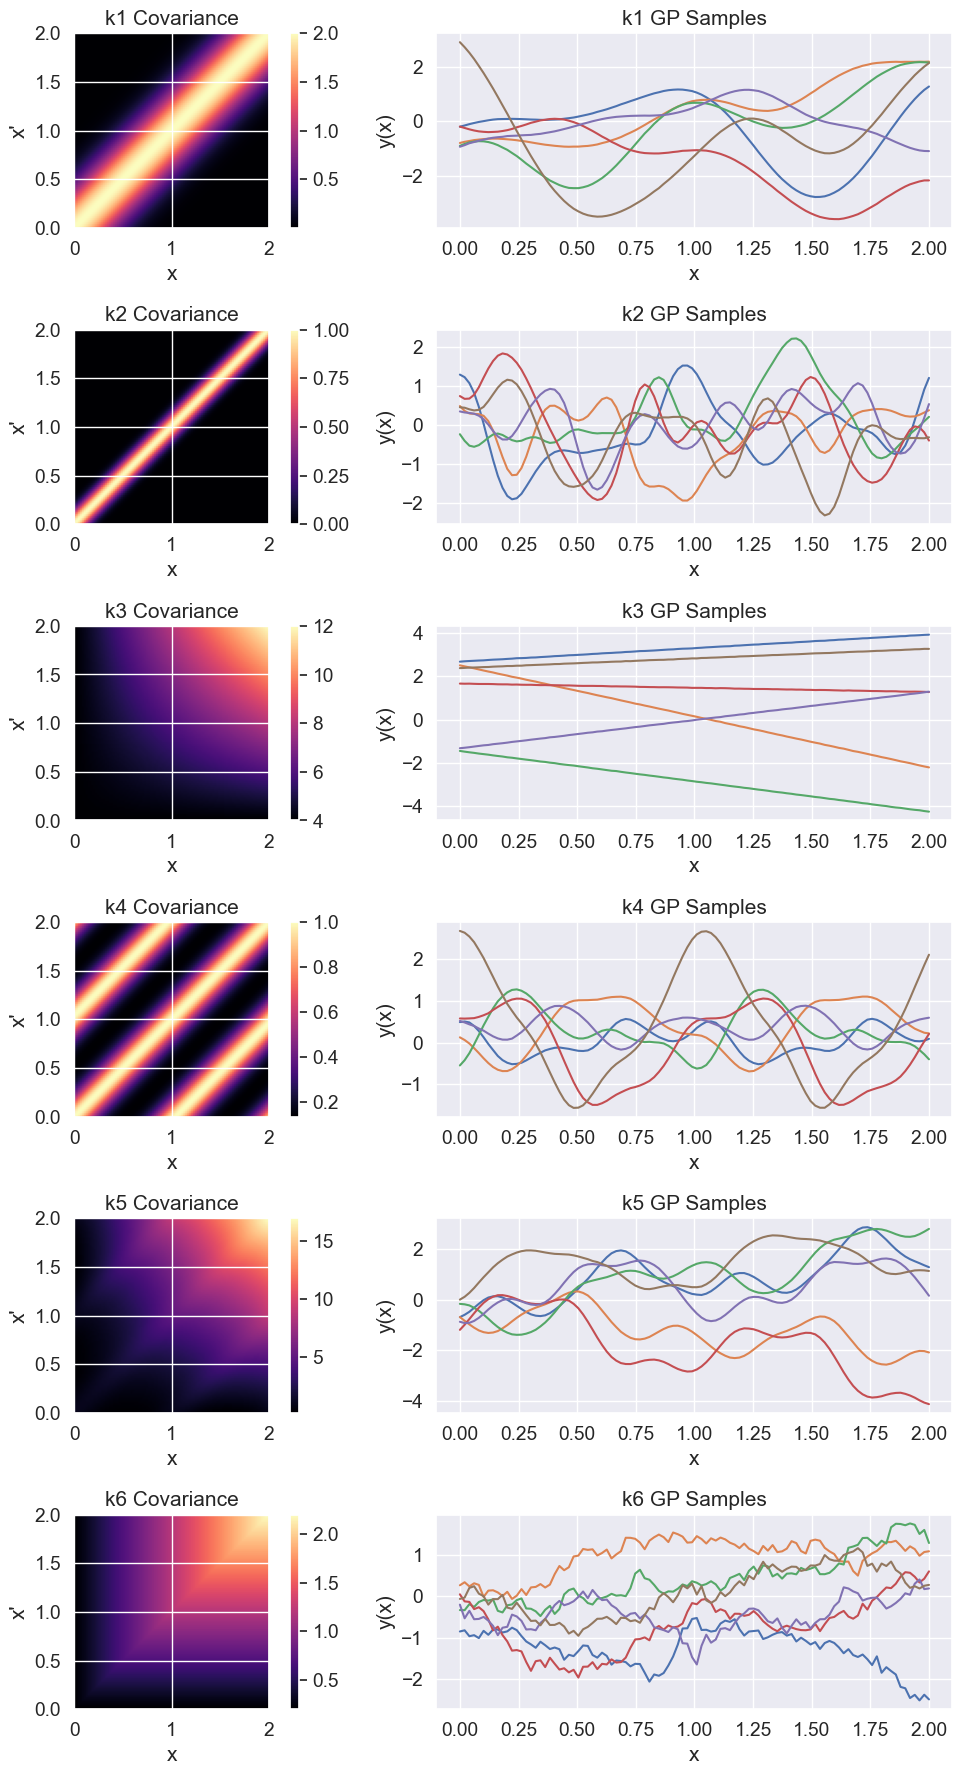

In [ ]:
X = np.linspace(0, 2, 100).reshape(-1, 1)

#We start by definning the different covariance functions (kernels) that we will use in the Gaussian processes.
def k1(x1, x2):
    return 2 * np.exp(-(x1 - x2.T) ** 2 / (2 * 0.3 ** 2))

def k2(x1, x2):
    return np.exp(-(x1 - x2.T) ** 2 / (2 * 0.1 ** 2))

def k3(x1, x2):
    return 4 + 2 * x1 @ x2.T

def k4(x1, x2):
    return np.exp(-2 * np.sin(3 * np.abs(x1 - x2.T)) ** 2)

def k5(x1, x2):
    return np.exp(-2 * np.sin(3 * np.abs(x1 - x2.T)) ** 2) + 4 * x1 @ x2.T

def k6(x1, x2):
    return 0.2 + np.minimum(x1, x2.T)

kernels = [k1, k2, k3, k4, k5, k6]
titles = [f"k{i+1}" for i in range(6)]

fig, axes = plt.subplots(6, 2, figsize=(12, 18))
rng = np.random.default_rng(42)

for i, (kernel, title) in enumerate(zip(kernels, titles)):
    K = kernel(X, X)
    #We add a small value to the diagonal to ensure the matrix is positive definite.
    K += 1e-5 * np.eye(len(X))
    
    #We sample from the multivariate normal distribution using the covariance matrix K.
    #Thus generating samples from the Gaussian process.
    samples = rng.multivariate_normal(mean=np.zeros(len(X)), cov=K, size=6)

    ax_cov = axes[i, 0]
    im = ax_cov.imshow(K, cmap="magma", origin="lower", extent=[0, 2, 0, 2])
    ax_cov.set_xlabel("x")
    ax_cov.set_ylabel("x'")
    ax_cov.set_title(f"{title} Covariance")
    plt.colorbar(im, ax=ax_cov, fraction=0.046, pad=0.04)

    ax_gp = axes[i, 1]
    for s in samples:
        ax_gp.plot(X, s)
    ax_gp.set_title(f"{title} GP Samples")
    ax_gp.set_xlabel("x")
    ax_gp.set_ylabel("y(x)")

plt.tight_layout()
plt.show()

Comparing our results above with the ones provided by the assignment we can confirm the following alignment.

\begin{align}
(a) &= k_2 \\
(b) &= k_6 \\
(c) &= k_5 \\
(d) &= k_1 \\
(e) &= k_4 \\
(f) &= k_3
\end{align}